# Results Analysis - eBay graph

In [79]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import torch
import seaborn as sns
from matplotlib import axes
import os 
import pandas as pd
import json

import sys, os
sys.path.append('/cluster/home/kamara/Explain')
from clutils.nbutils import *
from clutils.nbutils.params import get_param_ranges
os.getcwd()
sns.set()

In [80]:
dict_marker = {"perturbation":"o", "baseline":"X", "gradient":"s"}
pal = sns.color_palette("Paired", 12)
dict_color = {"random":pal[0], "distance":pal[1], "pagerank":pal[2], "sa": pal[3], "ig": pal[4], "gradcam": pal[5], "occlusion":pal[6], 
              "basic_gnnexplainer": pal[7], "gnnexplainer": pal[8], 
              "pgmexplainer":pal[9], "subgraphx": pal[10], "pgexplainer": pal[11]}


In [81]:
sns.set_context("notebook", rc={"legend.fontsize":15, "legend.title_fontsize":20, 
                                "axes.titlesize":22,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

In [82]:
dir = '/cluster/home/kamara/Explain/csv/node_classification/ebay'

#jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_cc.json'
#ranges = get_param_ranges(jsonpath)

df_res = pd.read_csv(os.path.join(dir, f'exp_result_decode_exp18_19_full.csv'), index_col = 0)
res = df_res.groupby(by=['dataset', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
res = res.reset_index()
#res.to_csv(os.path.join(dir, f'ebay_results.csv'), index=False)

In [55]:
#dir = '/cluster/home/kamara/Explain/csv/node_classification/ebay'

#jsonpath = f'/cluster/home/kamara/Explain/configs/syn/topk/config_syn_topk_cc.json'
#ranges = get_param_ranges(jsonpath)

#df_res_all = pd.read_csv(os.path.join(dir, f'exp_result_decode_exp13.csv'), index_col = 0)
#df_res_sa_ig = pd.read_csv(os.path.join(dir, f'exp_result_decode_exp11.csv'), index_col = 0) #
#df_res_sa_ig = df_res_sa_ig[(df_res_sa_ig.explainer_name=="sa")|(df_res_sa_ig.explainer_name=="ig")]
#df_res = pd.concat([df_res_all, df_res_sa_ig])
#res = df_res.groupby(by=['dataset', 'explainer_name', 'true_label_as_target', 'hard_mask']).mean()
#res = res.reset_index()
#res.to_csv(os.path.join(dir, f'ebay_results.csv'), index=False)
#res

In [56]:
df_res.columns = df_res.columns.str.replace('gnn_train_scores__', 'train_')
df_res.columns = df_res.columns.str.replace('gnn_test_scores__', 'test_')
df_res.columns = df_res.columns.str.replace('fidelity__', '')
df_res.columns = df_res.columns.str.replace('transformed_mask_infos__', '')
df_res.columns = df_res.columns.str.replace('infos__', '')
df_res.columns = df_res.columns.str.replace('initial_edge_mask_infos__', '')
df_res = df_res.reset_index(drop=True)

In [57]:
def explainer_type(row):
    if row['explainer_name'] in ['basic_gnnexplainer', 'gnnexplainer', 'pgmexplainer', 'occlusion', 'subgraphx', 'pgexplainer'] :
      return('perturbation')
    elif row['explainer_name'] in ['sa', 'ig', 'gradcam'] :
      return('gradient')
    return('baseline')

df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [58]:
df_res["1-fidelity_acc-"] = 1- df_res["fidelity_acc-"]
df_res["1-fidelity_prob-"] = 1- df_res["fidelity_prob-"]
df_res['charact_prob'] = 2 * df_res['fidelity_prob+'] * (1-df_res['fidelity_prob-'])/ (df_res['fidelity_prob+']  + 1-df_res['fidelity_prob-'])
df_res['charact_acc'] = 2 * df_res['fidelity_acc+'] * (1-df_res['fidelity_acc-'])/ (df_res['fidelity_acc+']  + 1-df_res['fidelity_acc-'])


In [59]:
df_res["1-fidelity_gnn_acc-"] = 1- df_res["fidelity_gnn_acc-"]
df_res["1-fidelity_gnn_prob-"] = 1- df_res["fidelity_gnn_prob-"]
df_res['charact_gnn_prob'] = 2 * df_res['fidelity_gnn_prob+'] * (1-df_res['fidelity_gnn_prob-'])/ (df_res['fidelity_gnn_prob+']  + 1-df_res['fidelity_gnn_prob-'])
df_res['charact_gnn_acc'] = 2 * df_res['fidelity_gnn_acc+'] * (1-df_res['fidelity_gnn_acc-'])/ (df_res['fidelity_gnn_acc+']  + 1-df_res['fidelity_gnn_acc-'])


In [60]:
#df_res = df_res.reset_index(drop=True)
#df_res = df_res[df_res.explainer_name!="pgexplainer"]
df_res.columns

Index(['explain_graph', 'explainer_name', 'true_label_as_target', 'hard_mask',
       'seed', 'train_prec', 'train_recall', 'train_f1-score', 'train_acc',
       'train_roc_auc', 'test_prec', 'test_recall', 'test_f1-score',
       'test_acc', 'test_roc_auc', 'initial_edge_mask_mask_size',
       'initial_edge_mask_mask_entropy', 'initial_edge_mask_max_avg',
       'dataset', 'explainer', 'number_of_edges', 'num_test', 'num_test_final',
       'groundtruth target', 'time', 'edge_mask_sparsity_init',
       'edge_mask_size_init', 'mask_entropy', 'mask_size', 'max_avg', 'topk',
       'fidelity_acc+', 'fidelity_acc-', 'fidelity_prob+', 'fidelity_prob-',
       'topk', 'fidelity_gnn_acc+', 'fidelity_gnn_acc-', 'fidelity_gnn_prob+',
       'fidelity_gnn_prob-', 'type', '1-fidelity_acc-', '1-fidelity_prob-',
       'charact_prob', 'charact_acc', '1-fidelity_gnn_acc-',
       '1-fidelity_gnn_prob-', 'charact_gnn_prob', 'charact_gnn_acc'],
      dtype='object')

In [61]:
df_res.loc[df_res['true_label_as_target']==False, 'charact_prob'] = df_res['charact_gnn_prob']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_prob+'] = df_res['fidelity_gnn_prob+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_prob-"] = df_res["1-fidelity_gnn_prob-"]

df_res.loc[df_res['true_label_as_target']==False, 'charact_acc'] = df_res['charact_gnn_acc']
df_res.loc[df_res['true_label_as_target']==False, 'fidelity_acc+'] = df_res['fidelity_gnn_acc+']
df_res.loc[df_res['true_label_as_target']==False, "1-fidelity_acc-"] = df_res["1-fidelity_gnn_acc-"]

In [62]:
# Drop duplicate columns
df_res = df_res.T.groupby(level=0).first().T

In [63]:
df_res.columns

Index(['1-fidelity_acc-', '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-',
       '1-fidelity_prob-', 'charact_acc', 'charact_gnn_acc',
       'charact_gnn_prob', 'charact_prob', 'dataset', 'edge_mask_size_init',
       'edge_mask_sparsity_init', 'explain_graph', 'explainer',
       'explainer_name', 'fidelity_acc+', 'fidelity_acc-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'fidelity_prob+', 'fidelity_prob-', 'groundtruth target', 'hard_mask',
       'initial_edge_mask_mask_entropy', 'initial_edge_mask_mask_size',
       'initial_edge_mask_max_avg', 'mask_entropy', 'mask_size', 'max_avg',
       'num_test', 'num_test_final', 'number_of_edges', 'seed', 'test_acc',
       'test_f1-score', 'test_prec', 'test_recall', 'test_roc_auc', 'time',
       'topk', 'train_acc', 'train_f1-score', 'train_prec', 'train_recall',
       'train_roc_auc', 'true_label_as_target', 'type'],
      dtype='object')

In [26]:
res = df_res.groupby(by=['dataset', "true_label_as_target", "hard_mask", 'topk', 'explainer_name']).apply(lambda x: x.mean(skipna=True))
res = res.drop(columns=['seed', 'topk', 'hard_mask', 'true_label_as_target'])
#res[['mask_size', "mask_entropy", "max_avg"]]
res

/tmp/ipykernel_10854/3235046604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  res = df_res.groupby(by=['dataset', "true_label_as_target", "hard_mask", 'topk', 'explainer_name']).apply(lambda x: x.mean(skipna=True))


1-fidelity_acc-  \
dataset    true_label_as_target hard_mask topk explainer_name                        
ebay_small False                False     1    basic_gnnexplainer         0.638000   
                                               distance                   0.702000   
                                               gnnexplainer               0.648000   
                                               gradcam                    0.802000   
                                               ig                         0.658000   
...                                                                            ...   
           True                 True      100  pagerank                   0.974000   
                                               pgmexplainer               0.983175   
                                               random                     0.600000   
                                               sa                         0.940000   
                                               subgraphx                  0.840000   

                                                                   1-fidelity_gnn_acc-  \
dataset    true_label_as_target hard_mask topk explainer_name                            
ebay_small False                False     1    basic_gnnexplainer                0.638   
                                               distance                          0.702   
                                               gnnexplainer                      0.648   
                                               gradcam                           0.802   
                                               ig                                0.658   
...                                                                                ...   
           True                 True      100  pagerank                            NaN   
                                               pgmexplainer                        NaN   
                                               random                              NaN   
                                               sa                                  NaN   
                                               subgraphx                           NaN   

                                                                   1-fidelity_gnn_prob-  \
dataset    true_label_as_target hard_mask topk explainer_name                             
ebay_small False                False     1    basic_gnnexplainer              0.794647   
                                               distance                        0.824470   
                                               gnnexplainer                    0.796252   
                                               gradcam                         0.843888   
                                               ig                              0.799478   
...                                                                                 ...   
           True                 True      100  pagerank                             NaN   
                                               pgmexplainer                         NaN   
                                               random                               NaN   
                                               sa                                   NaN   
                                               subgraphx                            NaN   

                                                                   1-fidelity_prob-  \
dataset    true_label_as_target hard_mask topk explainer_name                         
ebay_small False                False     1    basic_gnnexplainer          0.794647   
                                               distance                    0.824470   
                                               gnnexplainer                0.796252   
                                               gradcam                     0.843888   
                                               ig                      

In [27]:
res.columns

Index(['1-fidelity_acc-', '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-',
       '1-fidelity_prob-', 'charact_acc', 'charact_gnn_acc',
       'charact_gnn_prob', 'charact_prob', 'edge_mask_size_init',
       'edge_mask_sparsity_init', 'explain_graph', 'fidelity_acc+',
       'fidelity_acc-', 'fidelity_gnn_acc+', 'fidelity_gnn_acc-',
       'fidelity_gnn_prob+', 'fidelity_gnn_prob-', 'fidelity_prob+',
       'fidelity_prob-', 'groundtruth target',
       'initial_edge_mask_mask_entropy', 'initial_edge_mask_mask_size',
       'initial_edge_mask_max_avg', 'mask_entropy', 'mask_size', 'max_avg',
       'num_test', 'num_test_final', 'number_of_edges', 'test_acc',
       'test_f1-score', 'test_prec', 'test_recall', 'test_roc_auc', 'time',
       'train_acc', 'train_f1-score', 'train_prec', 'train_recall',
       'train_roc_auc'],
      dtype='object')

In [28]:
res = res.reset_index()

dir = '/cluster/home/kamara/Explain/csv/node_classification/ebay'
res.to_csv(os.path.join(dir, f'ebay_results_5expe.csv'), index=False)

## Analysis

In [83]:
df_res = pd.read_csv(os.path.join(dir, 'ebay_results_5expe.csv'), index_col = 0)
df_res = df_res.reset_index()
df_res['type'] = df_res.apply(lambda row: explainer_type(row), axis=1)

In [84]:
topk_val = 10
dfs = df_res[(df_res.topk==topk_val)]
dfc = dfs.groupby(["dataset", "explainer_name"]).mean().reset_index()
dfc = dfc[["dataset", "explainer_name", "charact_acc"]]

dfc['Characterization'] = dfc.groupby('dataset')['charact_acc'].rank(ascending=False)
dfc = dfc.sort_values(['dataset', 'Characterization'])

dfc = pd.pivot_table(dfc, values=['Characterization'], index=['explainer_name'], columns="dataset")
dfc['mean_rank'] = dfc.mean(axis=1)
dfc['final_rank'] = dfc['mean_rank'].rank(ascending=True)
dfc = dfc.sort_values(by=['mean_rank'])
dfc

,Characterization,mean_rank,final_rank
dataset,ebay_small,,
explainer_name,,,
gnnexplainer,1.0,1.0,1.0
pgmexplainer,2.0,2.0,2.0
occlusion,3.0,3.0,3.0
pagerank,4.0,4.0,4.0
random,5.0,5.0,5.0
gradcam,6.0,6.0,6.0
sa,7.0,7.0,7.0
distance,8.0,8.0,8.0


In [85]:
dfc.columns = dfc.columns.droplevel(0) #remove amount
dfc.columns.name = None               #remove categories
dfc = dfc.reset_index()
dfc['type'] = dfc.apply(lambda row: explainer_type(row), axis=1)

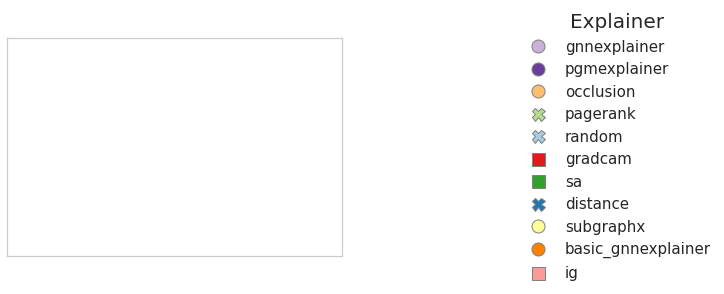

In [86]:
explainer_to_type_dict = dfc.set_index("explainer_name")["type"].to_dict()
handles, labels = [], []
for key, val in explainer_to_type_dict.items():
    # Using Line2D to create the markers for the legend. This is the creation of the proxy artists.
    handles.append(Line2D([0], [0], linewidth=0, color="grey", marker=dict_marker[val], markersize=13, markerfacecolor=dict_color[key]))
    labels.append(key)


# Calling the handles and labels to create the legend, where the handles are the club and circle created previously, and the labels are what the markers are labeled in the legend. Also moves the legend outside the figure
leg = plt.legend(handles,labels, loc = "center left", bbox_to_anchor = (1.5, 0.5), numpoints = 1, title="Explainer", frameon=False)

plt.gca().xaxis.set_visible(False)
plt.gca().yaxis.set_visible(False)
#plt.savefig('/cluster/home/kamara/Explain/figures/ebay/legend_charact_rank_k10_5expe.pdf', bbox_inches='tight')
#plt.savefig('/cluster/home/kamara/Explain/figures/ebay/legend_charact_rank_k10_5expe.png', bbox_inches='tight')

## GNN scores

In [87]:
df_res[['train_prec', 'train_recall',
       'train_f1-score', 'train_acc', 'test_prec', 'test_recall',
       'test_f1-score', 'test_acc']].drop_duplicates()

,train_prec,train_recall,train_f1-score,train_acc,test_prec,test_recall,test_f1-score,test_acc
0,0.563827,0.66346,0.587655,0.956958,0.567453,0.670124,0.592784,0.958527


## Performance VS Time

In [88]:
import pandas as pd
import numpy as np
from pandas.api.types import is_numeric_dtype

def mean_str(col):
    if is_numeric_dtype(col):
        return col.mean()
    else:
        return col.unique() if col.nunique() == 1 else np.NaN

In [97]:
df_gen = df_res[df_res.topk == 10]
df_gen = df_gen.groupby(['explainer_name', 'true_label_as_target', 'hard_mask', 'type']).agg(mean_str)#.mean()
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

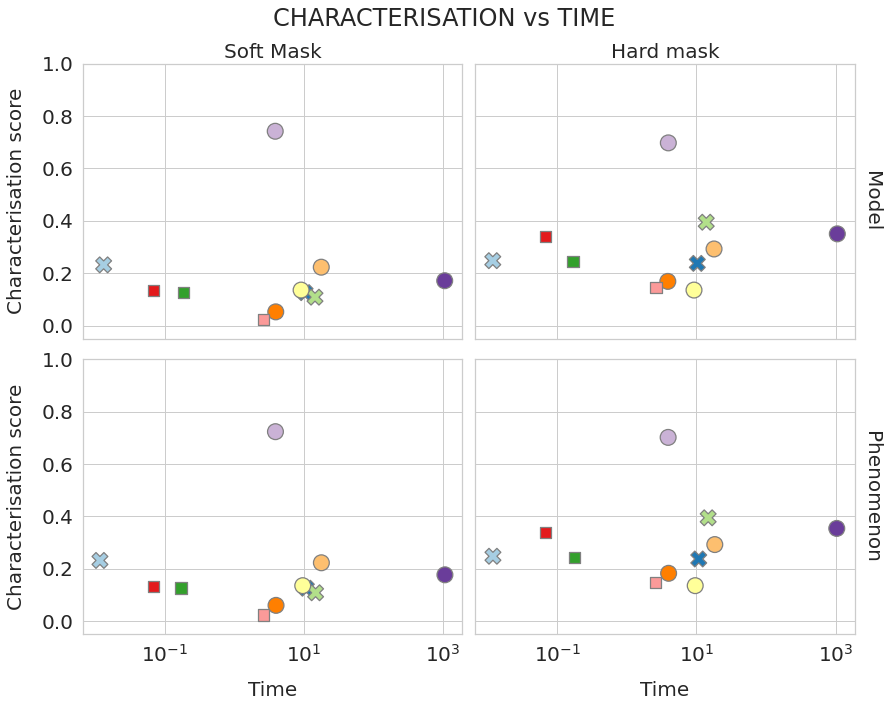

In [98]:
df_gen.columns = [n if n != "explainer_name" else "Explainer" for n in df_gen.columns]
df_gen.columns = [n if n != "type" else "Type" for n in df_gen.columns]

g = sns.FacetGrid(df_gen, row='true_label_as_target', col="hard_mask", height=5, aspect=1.25, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_acc",
    hue="Explainer", palette=dict_color, s=250, style="Type", alpha =1, edgecolor="grey").set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=24)
g.set(ylim=(-0.05,1))
g.fig.subplots_adjust(top=0.88)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score", labelpad=15)

plt.tight_layout()
plt.show()


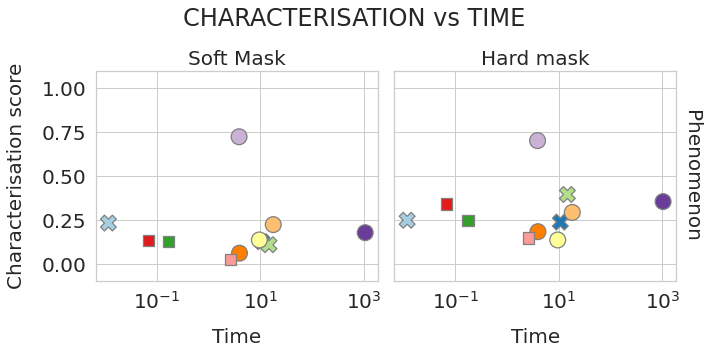

In [99]:
df_gen.columns = [n if n != "explainer_name" else "Explainer" for n in df_gen.columns]
df_gen.columns = [n if n != "type" else "Type" for n in df_gen.columns]

g = sns.FacetGrid(df_gen[df_gen['true_label_as_target']=="Phenomenon"], row='true_label_as_target', col="hard_mask", height=5, aspect=1, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="time", y="charact_acc",
    hue="Explainer", palette=dict_color, s=250, style="Type", alpha =1, edgecolor="grey").set(xscale = 'log')
g.fig.suptitle("CHARACTERISATION vs TIME", fontsize=24)
g.set(ylim=(-0.1,1.1))
g.fig.subplots_adjust(top=0.88)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Time", y_var="Characterisation score", labelpad=15)

plt.tight_layout()
plt.show()
#g.savefig('/cluster/home/kamara/Explain/figures/ebay/charact_vs_time_k_10_5expe.pdf', bbox_inches='tight')
#g.savefig('/cluster/home/kamara/Explain/figures/ebay/charact_vs_time_k_10_5expe.png', bbox_inches='tight')


# Explanation type 
Default topk = 10

In [100]:
df = df_res[df_res['topk']==10]
#df = df_res

## Avg on all datasets

In [101]:
df_gen = df.groupby(['explainer_name', 'true_label_as_target', 'hard_mask']).agg(mean_str)
df_gen = df_gen.reset_index()
df_gen['hard_mask'] = df_gen['hard_mask'].replace({False:'Soft Mask', True:'Hard mask'})
df_gen['true_label_as_target'] = df_gen['true_label_as_target'].replace({False:'Model', True:'Phenomenon'})

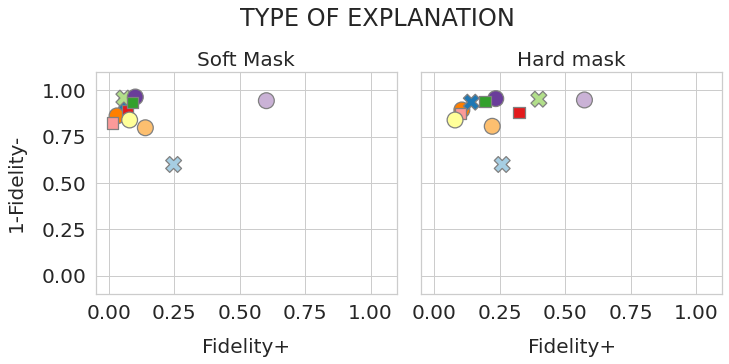

In [102]:
df_gen.columns = [n if n != "explainer_name" else "Explainer" for n in df_gen.columns]
df_gen.columns = [n if n != "type" else "Type" for n in df_gen.columns]
g = sns.FacetGrid(df_gen[df_gen.true_label_as_target=="Phenomenon"], col="hard_mask", height=5, aspect=1, margin_titles=True, despine=False)
g.map_dataframe(sns.scatterplot, x="fidelity_acc+", y="1-fidelity_acc-",
    hue="Explainer", palette=dict_color, style="Type", alpha =1, edgecolor="grey", s=250)
g.fig.suptitle("TYPE OF EXPLANATION", fontsize=24)
g.set(ylim=(-0.1,1.1))
g.set(xlim=(-0.05,1.1))
 
g.fig.subplots_adjust(top=0.8)
g.set_titles(row_template = '{row_name}', col_template = '{col_name}')
g.set_axis_labels(x_var="Fidelity+", y_var="1-Fidelity-", labelpad=15)

plt.show()
#g.savefig('/cluster/home/kamara/Explain/figures/ebay/type_k_10_5expe.pdf', bbox_inches='tight')
#g.savefig('/cluster/home/kamara/Explain/figures/ebay/type_k_10_5expe.png', bbox_inches='tight')


## Connectivity

In [25]:
sns.set_context("notebook", rc={"legend.fontsize":20, "legend.title_fontsize":22, 
                                "axes.titlesize":24,"axes.labelsize":20,
                               "xtick.labelsize" : 20, "ytick.labelsize" : 20})
sns.set_style("whitegrid")

ValueError: Could not interpret value `cc_ratio` for parameter `y`

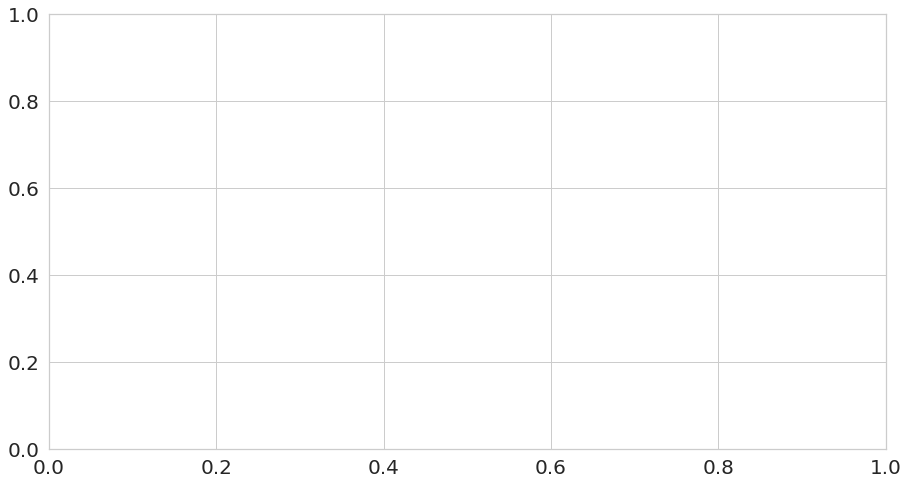

In [26]:
fig, ax = plt.subplots(figsize=(15,8))

g = sns.lineplot(data=df_res, x="topk", y='cc_ratio',
    hue="explainer_name", palette=dict_color, marker="o", ax=ax, linewidth=2.8, markersize=8)

plt.title('Explanation connectivity', fontsize=24, pad=20)
# Put the legend out of the figure
leg = g.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Explainer")
for i in range(12):
    leg.get_lines()[i].set_linewidth(6)
plt.subplots_adjust(hspace = 0.8)
plt.ylim(-0.05,1)
plt.xlabel("topk")
plt.ylabel("Connected Component Ratio")
plt.show()
fig.savefig('/cluster/home/kamara/Explain/figures/ebay/connectivity.pdf', bbox_inches='tight')

# Mask properties vs Performance 
Sparsity = 0 bc we are interested in the initial masks (without transformation)

In [27]:
df = df_res[df_res['topk']==10]
#df = df_res

In [30]:
df.columns

Index(['1-fidelity_acc-', '1-fidelity_gnn_acc-', '1-fidelity_gnn_prob-',
       '1-fidelity_prob-', 'charact_acc', 'charact_gnn_acc',
       'charact_gnn_prob', 'charact_prob', 'dataset', 'edge_mask_size_init',
       'edge_mask_sparsity_init', 'explain_graph', 'explainer',
       'explainer_name', 'fidelity_acc+', 'fidelity_acc-', 'fidelity_gnn_acc+',
       'fidelity_gnn_acc-', 'fidelity_gnn_prob+', 'fidelity_gnn_prob-',
       'fidelity_prob+', 'fidelity_prob-', 'groundtruth target', 'hard_mask',
       'initial_edge_mask_mask_entropy', 'initial_edge_mask_mask_size',
       'initial_edge_mask_max_avg', 'mask_entropy', 'mask_size', 'max_avg',
       'num_test', 'num_test_final', 'number_of_edges', 'seed', 'test_acc',
       'test_f1-score', 'test_prec', 'test_recall', 'test_roc_auc', 'time',
       'topk', 'train_acc', 'train_f1-score', 'train_prec', 'train_recall',
       'train_roc_auc', 'true_label_as_target', 'type'],
      dtype='object')

In [28]:
sns.set_context("notebook", rc={"legend.fontsize":12, "legend.title_fontsize":12, 
                                "axes.titlesize":14,"axes.labelsize":14,
                               "xtick.labelsize" : 12, "ytick.labelsize" : 12})


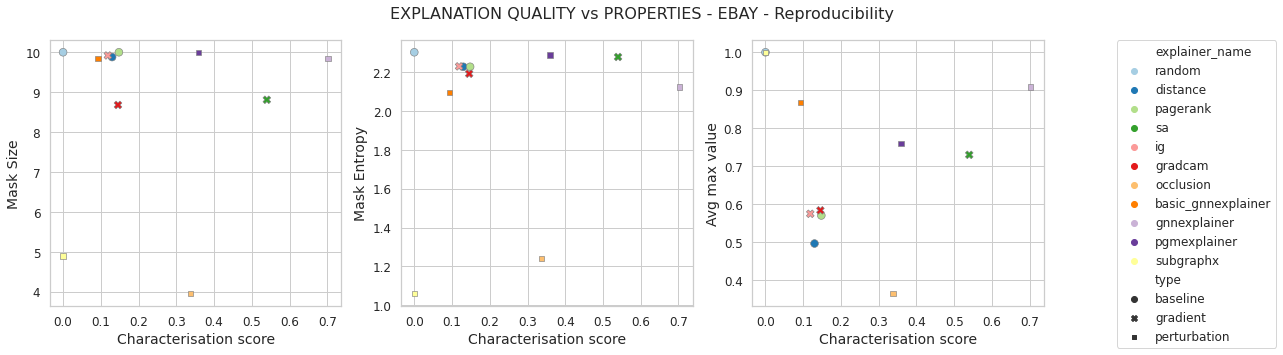

In [31]:
df_mask_data = df[(df['true_label_as_target']==True)&(df['hard_mask']==False)]
fig, axs = plt.subplots(1,3, figsize=(18, 5), sharex=True)

g1 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_size",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[0], legend=False)
axs[0].set_ylabel('Mask Size')
axs[0].set_xlabel('Characterisation score')

g2 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="mask_entropy",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[1], legend=False)
axs[1].set_ylabel('Mask Entropy')
axs[1].set_xlabel('Characterisation score')

g3 = sns.scatterplot(data =df_mask_data, x="charact_acc", y="max_avg",
    hue="explainer_name", palette=dict_color, s=60, style="type", alpha =1, edgecolor="grey", ax = axs[2])
axs[2].set_ylabel('Avg max value')
axs[2].set_xlabel('Characterisation score')

# produce a legend with the unique colors from the scatter
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
fig.suptitle('EXPLANATION QUALITY vs PROPERTIES - EBAY - Reproducibility', fontsize=16)
plt.grid(True)
plt.tight_layout()
plt.show()
#fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.pdf')
#fig.savefig(f'/cluster/home/kamara/Explain/figures/topk/charact_vs_properties/fig_mask_prop_{data}_prob.png')
